## Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import optuna.integration.lightgbm as lgb

In [3]:
df_train = pd.read_csv("C:/Users/daisu/OneDrive/Desktop/Input/train.csv")
df_test = pd.read_csv("C:/Users/daisu/OneDrive/Desktop/Input/test.csv")

In [4]:
print(f"Index numbers: {df_train.shape[0]}, Column numbers: {df_train.shape[1]}")
print(f"Index numbers: {df_test.shape[0]}, Column numbers: {df_train.shape[1]}")

Index numbers: 171202, Column numbers: 51
Index numbers: 61500, Column numbers: 51


In [5]:
# plt.figure(figsize=(30, 20))
# sns.heatmap(df.corr(), annot=True)

In [6]:
print(f"train_null: {df_train.isnull().sum()}")
print(f"test_null: {df_test.isnull().sum()}")

train_null: SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                    34241
FLAG_OWN_REALTY                 34241
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   163
NAME_TYPE_SUITE                   747
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    112992
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0


In [7]:
df_train.drop(["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "OWN_CAR_AGE", "OCCUPATION_TYPE", "EXT_SOURCE_1", "EXT_SOURCE_3", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1, inplace=True)
df_test.drop(["FLAG_OWN_CAR", "FLAG_OWN_REALTY", "OWN_CAR_AGE", "OCCUPATION_TYPE", "EXT_SOURCE_1", "EXT_SOURCE_3", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"], axis=1, inplace=True)

In [8]:
df_train.shape

(171202, 41)

In [9]:
df_test.shape

(61500, 40)

In [10]:
for i in df_train.columns:
    if i not in df_test.columns:
        print(i)

TARGET


In [11]:
train_obj = df_train.select_dtypes("object")
test_obj  = df_test.select_dtypes("object")

In [12]:
for i in train_obj.columns:
    if i not in test_obj.columns:
        print(i)

In [14]:
train_obj= pd.get_dummies(train_obj)
test_obj= pd.get_dummies(test_obj)

In [15]:
train_numerical = df_train.select_dtypes(exclude="object")
test_numerical = df_test.select_dtypes(exclude="object")

In [16]:
# from scipy import stats

# z_scores = stats.zscore(numerical)
# abs_z_scores = np.abs(z_scores)
# abs_z_scores

In [17]:
train_numerical.drop(["SK_ID_CURR", "AMT_ANNUITY"], axis=1, inplace=True)
test_numerical.drop(["SK_ID_CURR", "AMT_ANNUITY"], axis=1, inplace=True)

C:\Users\daisu\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
for i in train_numerical.columns:
    if i not in test_numerical.columns:
        print(i)

TARGET


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 61 Text major ticklabel objects>)

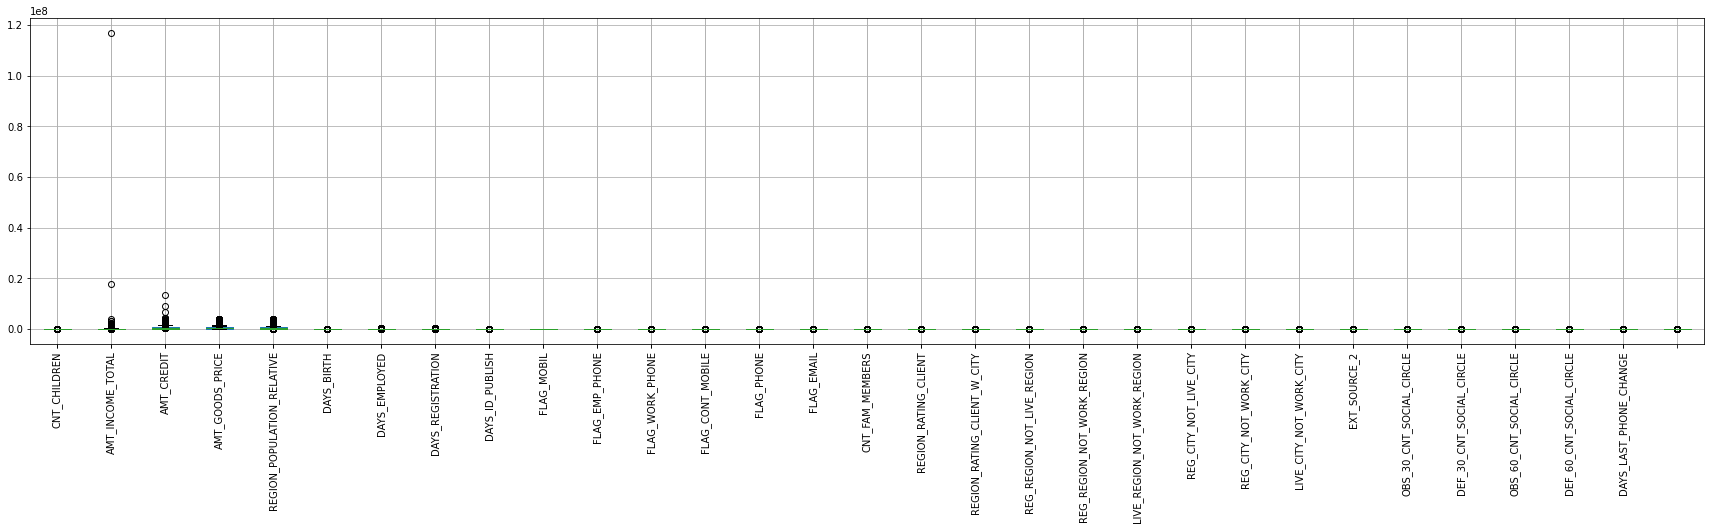

In [19]:
plt.figure(figsize=(30, 6))
train_numerical.boxplot()
test_numerical.boxplot()
plt.xticks(rotation=90)

In [20]:
train_df = pd.concat([train_obj, train_numerical], axis=1)
test_df = pd.concat([test_obj, test_numerical], axis=1)

output = train_df.pop("TARGET")

In [88]:
train_df.shape

(171202, 123)

In [85]:
test_df.shape

(61500, 123)

In [87]:
for i in train_df.columns:
    if i not in test_df.columns:
        print(i)

In [86]:
train_df.drop(["CODE_GENDER_XNA", "NAME_FAMILY_STATUS_Unknown"], axis=1, inplace=True)

In [89]:
print(f"Shape of train: {train_df.shape}")
print(f"Shape of test: {test_df.shape}")

Shape of train: (171202, 123)
Shape of test: (61500, 123)


## Train LightGBM

In [90]:
X = train_df.values
y = output.values

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [207]:
train = lgb.Dataset(X_train, y_train)
test  = lgb.Dataset(X_test, y_test)

params =  {"objective": "binary",
          "metric": "auc"}

lgb_trained = lgb.train(params,
                        train, valid_sets=test,
                        early_stopping_rounds=10)

best_params = lgb_trained.params
print("Params:     ")
for key, value in best_params.items():
    print(f"{key}: {value}")

[I 2020-12-05 15:28:05,898] A new study created in memory with name: no-name-bc280c57-b886-454f-8a34-6fdb717e1506
feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.674881
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.68179
[3]	valid_0's auc: 0.692836
[4]	valid_0's auc: 0.694918
[5]	valid_0's auc: 0.699729
[6]	valid_0's auc: 0.703575
[7]	valid_0's auc: 0.703655
[8]	valid_0's auc: 0.705896
[9]	valid_0's auc: 0.707216
[10]	valid_0's auc: 0.70723
[11]	valid_0's auc: 0.707368
[12]	valid_0's auc: 0.707786
[13]	valid_0's auc: 0.709668
[14]	valid

feature_fraction, val_score: 0.720057:  14%|#4        | 1/7 [00:00<00:05,  1.15it/s]


[69]	valid_0's auc: 0.720057
[70]	valid_0's auc: 0.719985
[71]	valid_0's auc: 0.719978
[72]	valid_0's auc: 0.71989
[73]	valid_0's auc: 0.720031
[74]	valid_0's auc: 0.720023
[75]	valid_0's auc: 0.720048
[76]	valid_0's auc: 0.719925
[77]	valid_0's auc: 0.719817
[78]	valid_0's auc: 0.719674
[79]	valid_0's auc: 0.719614
Early stopping, best iteration is:
[69]	valid_0's auc: 0.720057
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.67461
Training until validation s

feature_fraction, val_score: 0.720057:  29%|##8       | 2/7 [00:01<00:04,  1.18it/s]

[68]	valid_0's auc: 0.718319
[69]	valid_0's auc: 0.718213
[70]	valid_0's auc: 0.718364
Early stopping, best iteration is:
[60]	valid_0's auc: 0.718702
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.685161
[3]	valid_0's auc: 0.689214
[4]	valid_0's auc: 0.693116
[5]	valid_0's auc: 0.695573
[6]	valid_0's auc: 0.696752
[7]	valid_0's auc: 0.698347
[8]	valid_0's auc: 0.699533
[

feature_fraction, val_score: 0.720817:  43%|####2     | 3/7 [00:02<00:03,  1.18it/s]


[76]	valid_0's auc: 0.72027
[77]	valid_0's auc: 0.72015
[78]	valid_0's auc: 0.720176
[79]	valid_0's auc: 0.720139
[80]	valid_0's auc: 0.720344
[81]	valid_0's auc: 0.720458
[82]	valid_0's auc: 0.720398
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720817
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.676841
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.681005
[3]	valid_0's auc: 0.686874
[4]	valid_0's auc: 0.691613
[5]	valid_0's auc: 0.693886
[6]	valid_0's auc: 0.696173
[7]	va

feature_fraction, val_score: 0.720817:  57%|#####7    | 4/7 [00:03<00:02,  1.21it/s]


[45]	valid_0's auc: 0.717445
[46]	valid_0's auc: 0.7175
[47]	valid_0's auc: 0.717723
[48]	valid_0's auc: 0.718033
[49]	valid_0's auc: 0.717997
[50]	valid_0's auc: 0.718178
[51]	valid_0's auc: 0.718204
[52]	valid_0's auc: 0.718056
[53]	valid_0's auc: 0.718026
[54]	valid_0's auc: 0.718196
[55]	valid_0's auc: 0.718249
[56]	valid_0's auc: 0.71838
[57]	valid_0's auc: 0.718422
[58]	valid_0's auc: 0.718383
[59]	valid_0's auc: 0.718362
[60]	valid_0's auc: 0.718357
[61]	valid_0's auc: 0.718439
[62]	valid_0's auc: 0.718443
[63]	valid_0's auc: 0.71845
[64]	valid_0's auc: 0.718723
[65]	valid_0's auc: 0.718758
[66]	valid_0's auc: 0.718682
[67]	valid_0's auc: 0.718528
[68]	valid_0's auc: 0.718586
[69]	valid_0's auc: 0.718647
[70]	valid_0's auc: 0.718656
[71]	valid_0's auc: 0.718595
[72]	valid_0's auc: 0.718618
[73]	valid_0's auc: 0.718598
[74]	valid_0's auc: 0.718522
[75]	valid_0's auc: 0.718362
Early stopping, best iteration is:
[65]	valid_0's auc: 0.718758


[I 2020-12-05 15:28:09,191] Trial 3 finished with value: 0.7187578492519545 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 2 with value: 0.7208168321080473.
feature_fraction, val_score: 0.720817:  57%|#####7    | 4/7 [00:03<00:02,  1.21it/s]

[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677135
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.692368
[3]	valid_0's auc: 0.700078
[4]	valid_0's auc: 0.703143
[5]	valid_0's auc: 0.704639
[6]	valid_0's auc: 0.705164
[7]	valid_0's auc: 0.706166
[8]	valid_0's auc: 0.706314
[9]	valid_0's auc: 0.706735
[10]	valid_0's auc: 0.707503
[11]	valid_0's auc: 0.708024
[12]	valid_0's auc: 0.708474
[13]	valid_0's auc: 0.709093
[14]	valid_0's auc: 0.709648
[15]	valid_0's auc: 0.709876
[16]	valid_0's

feature_fraction, val_score: 0.720817:  71%|#######1  | 5/7 [00:03<00:01,  1.30it/s]


[47]	valid_0's auc: 0.718224
[48]	valid_0's auc: 0.718239
[49]	valid_0's auc: 0.718039
[50]	valid_0's auc: 0.718015
[51]	valid_0's auc: 0.718057
Early stopping, best iteration is:
[41]	valid_0's auc: 0.718253
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.676841
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.689289
[3]	valid_0's auc: 0.695208
[4]	valid_0's auc: 0.697296
[5]	valid_0's auc: 0.69814
[6]	valid_0's auc: 0.698562

feature_fraction, val_score: 0.720817:  86%|########5 | 6/7 [00:04<00:00,  1.30it/s]


[45]	valid_0's auc: 0.717909
[46]	valid_0's auc: 0.71797
[47]	valid_0's auc: 0.718212
[48]	valid_0's auc: 0.718211
[49]	valid_0's auc: 0.718241
[50]	valid_0's auc: 0.718333
[51]	valid_0's auc: 0.718439
[52]	valid_0's auc: 0.718451
[53]	valid_0's auc: 0.718438
[54]	valid_0's auc: 0.718417
[55]	valid_0's auc: 0.71871
[56]	valid_0's auc: 0.718773
[57]	valid_0's auc: 0.71888
[58]	valid_0's auc: 0.718871
[59]	valid_0's auc: 0.718919
[60]	valid_0's auc: 0.719033
[61]	valid_0's auc: 0.718918
[62]	valid_0's auc: 0.718749
[63]	valid_0's auc: 0.718729
[64]	valid_0's auc: 0.718542
[65]	valid_0's auc: 0.718586
[66]	valid_0's auc: 0.718732
[67]	valid_0's auc: 0.718651
[68]	valid_0's auc: 0.718515
[69]	valid_0's auc: 0.718465
[70]	valid_0's auc: 0.718279
Early stopping, best iteration is:
[60]	valid_0's auc: 0.719033
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012540 seconds.
You ca

num_leaves, val_score: 0.720817:   0%|          | 0/20 [00:00<?, ?it/s]


[45]	valid_0's auc: 0.718813
[46]	valid_0's auc: 0.719035
[47]	valid_0's auc: 0.719199
[48]	valid_0's auc: 0.719212
[49]	valid_0's auc: 0.719173
[50]	valid_0's auc: 0.719008
[51]	valid_0's auc: 0.719147
[52]	valid_0's auc: 0.71921
[53]	valid_0's auc: 0.718997
[54]	valid_0's auc: 0.719069
[55]	valid_0's auc: 0.719076
[56]	valid_0's auc: 0.719054
[57]	valid_0's auc: 0.719004
[58]	valid_0's auc: 0.719212
Early stopping, best iteration is:
[48]	valid_0's auc: 0.719212
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Sta

num_leaves, val_score: 0.720817:   5%|5         | 1/20 [00:00<00:18,  1.04it/s]


[31]	valid_0's auc: 0.708408
[32]	valid_0's auc: 0.708532
[33]	valid_0's auc: 0.708343
[34]	valid_0's auc: 0.708299
[35]	valid_0's auc: 0.707933
[36]	valid_0's auc: 0.707716
[37]	valid_0's auc: 0.707933
[38]	valid_0's auc: 0.707976
[39]	valid_0's auc: 0.708181
[40]	valid_0's auc: 0.708079
Early stopping, best iteration is:
[30]	valid_0's auc: 0.708779
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.675157
Training until validation scores don't improve for 10 

num_leaves, val_score: 0.720817:  10%|#         | 2/20 [00:02<00:18,  1.04s/it]


[38]	valid_0's auc: 0.704544
[39]	valid_0's auc: 0.704325
[40]	valid_0's auc: 0.703963
[41]	valid_0's auc: 0.703755
Early stopping, best iteration is:
[31]	valid_0's auc: 0.705069
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.68372
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.690889
[3]	valid_0's auc: 0.693287
[4]	valid_0's auc: 0.695872
[5]	valid_0's auc: 0.697339
[6]	valid_0's auc: 0.697934
[7]	valid_0's auc: 0.698257


num_leaves, val_score: 0.720817:  15%|#5        | 3/20 [00:02<00:16,  1.04it/s]


[52]	valid_0's auc: 0.714909
Early stopping, best iteration is:
[42]	valid_0's auc: 0.716279
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.648275
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.65233
[3]	valid_0's auc: 0.657183
[4]	valid_0's auc: 0.657926
[5]	valid_0's auc: 0.661769
[6]	valid_0's auc: 0.66371
[7]	valid_0's auc: 0.666691
[8]	valid_0's auc: 0.671325
[9]	valid_0's auc: 0.676629
[10]	valid_0's auc: 0.67846
[11]

num_leaves, val_score: 0.720817:  20%|##        | 4/20 [00:03<00:15,  1.06it/s]


[126]	valid_0's auc: 0.718947
[127]	valid_0's auc: 0.718986
[128]	valid_0's auc: 0.718949
[129]	valid_0's auc: 0.718911
[130]	valid_0's auc: 0.718938
[131]	valid_0's auc: 0.7189
[132]	valid_0's auc: 0.71895
[133]	valid_0's auc: 0.718984
[134]	valid_0's auc: 0.719095
[135]	valid_0's auc: 0.719183
[136]	valid_0's auc: 0.7192
[137]	valid_0's auc: 0.719214
[138]	valid_0's auc: 0.719313
[139]	valid_0's auc: 0.719385
[140]	valid_0's auc: 0.719353
[141]	valid_0's auc: 0.719394
[142]	valid_0's auc: 0.719655
[143]	valid_0's auc: 0.719689
[144]	valid_0's auc: 0.719676
[145]	valid_0's auc: 0.719634
[146]	valid_0's auc: 0.719637
[147]	valid_0's auc: 0.719643
[148]	valid_0's auc: 0.719635
[149]	valid_0's auc: 0.719615
[150]	valid_0's auc: 0.719641
[151]	valid_0's auc: 0.719643
[152]	valid_0's auc: 0.719601
[153]	valid_0's auc: 0.719675
Early stopping, best iteration is:
[143]	valid_0's auc: 0.719689
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-ch

num_leaves, val_score: 0.720817:  25%|##5       | 5/20 [00:04<00:14,  1.07it/s]


[41]	valid_0's auc: 0.71214
[42]	valid_0's auc: 0.712057
[43]	valid_0's auc: 0.711514
[44]	valid_0's auc: 0.71168
[45]	valid_0's auc: 0.71179
[46]	valid_0's auc: 0.71188
[47]	valid_0's auc: 0.711659
[48]	valid_0's auc: 0.711825
[49]	valid_0's auc: 0.711797
[50]	valid_0's auc: 0.711896
[51]	valid_0's auc: 0.711846
Early stopping, best iteration is:
[41]	valid_0's auc: 0.71214
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.647946
Training until validation scor

num_leaves, val_score: 0.720817:  30%|###       | 6/20 [00:05<00:12,  1.10it/s]


[128]	valid_0's auc: 0.718563
[129]	valid_0's auc: 0.718589
[130]	valid_0's auc: 0.718612
[131]	valid_0's auc: 0.718608
[132]	valid_0's auc: 0.718698
[133]	valid_0's auc: 0.718767
[134]	valid_0's auc: 0.718721
[135]	valid_0's auc: 0.718815
[136]	valid_0's auc: 0.718793
[137]	valid_0's auc: 0.718892
[138]	valid_0's auc: 0.718867
[139]	valid_0's auc: 0.71886
[140]	valid_0's auc: 0.718854
[141]	valid_0's auc: 0.718852
[142]	valid_0's auc: 0.718831
[143]	valid_0's auc: 0.718826
[144]	valid_0's auc: 0.718853
[145]	valid_0's auc: 0.71886
[146]	valid_0's auc: 0.718862
[147]	valid_0's auc: 0.718859
Early stopping, best iteration is:
[137]	valid_0's auc: 0.718892
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[L

num_leaves, val_score: 0.720817:  35%|###5      | 7/20 [00:06<00:12,  1.05it/s]


[46]	valid_0's auc: 0.707455
[47]	valid_0's auc: 0.70726
Early stopping, best iteration is:
[37]	valid_0's auc: 0.707724
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.683713
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.691632
[3]	valid_0's auc: 0.693567
[4]	valid_0's auc: 0.697186
[5]	valid_0's auc: 0.698467
[6]	valid_0's auc: 0.700588
[7]	valid_0's auc: 0.701381
[8]	valid_0's auc: 0.702538
[9]	valid_0's auc: 0.703113
[10]	valid_0's auc: 0.705834
[11]	valid_0's auc: 0.706456
[12]	val

num_leaves, val_score: 0.720817:  40%|####      | 8/20 [00:07<00:11,  1.05it/s]


[54]	valid_0's auc: 0.717104
Early stopping, best iteration is:
[44]	valid_0's auc: 0.717708
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.681136
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.689534
[3]	valid_0's auc: 0.692894
[4]	valid_0's auc: 0.695587
[5]	valid_0's auc: 0.696431
[6]	valid_0's auc: 0.69639
[7]	valid_0's auc: 0.697992
[8]	valid_0's auc: 0.699156
[9]	valid_0's auc: 0.700545
[10]	valid_0's auc: 0.702366
[1

num_leaves, val_score: 0.720817:  45%|####5     | 9/20 [00:08<00:10,  1.09it/s]


[38]	valid_0's auc: 0.711835
[39]	valid_0's auc: 0.712009
[40]	valid_0's auc: 0.711931
Early stopping, best iteration is:
[30]	valid_0's auc: 0.712336
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.681307
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.690011
[3]	valid_0's auc: 0.692531
[4]	valid_0's auc: 0.695681
[5]	valid_0's auc: 0.696412
[6]	valid_0's auc: 0.698333
[7]	valid_0's auc: 0.70074
[8]	valid_0's auc: 0.702028
[9]	valid_0's auc: 0.70369
[10]	valid_0's auc: 0.704312
[11]	vali

num_leaves, val_score: 0.720817:  50%|#####     | 10/20 [00:09<00:08,  1.16it/s]


[38]	valid_0's auc: 0.717483
[39]	valid_0's auc: 0.717305
[40]	valid_0's auc: 0.717451
[41]	valid_0's auc: 0.717515
[42]	valid_0's auc: 0.717535
[43]	valid_0's auc: 0.717348
[44]	valid_0's auc: 0.717375
[45]	valid_0's auc: 0.717394
[46]	valid_0's auc: 0.717482
[47]	valid_0's auc: 0.717452
[48]	valid_0's auc: 0.717295
[49]	valid_0's auc: 0.717229
[50]	valid_0's auc: 0.717021
[51]	valid_0's auc: 0.717129
[52]	valid_0's auc: 0.717039
Early stopping, best iteration is:
[42]	valid_0's auc: 0.717535
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-

num_leaves, val_score: 0.720817:  55%|#####5    | 11/20 [00:10<00:08,  1.05it/s]


[37]	valid_0's auc: 0.705549
[38]	valid_0's auc: 0.705471
[39]	valid_0's auc: 0.705398
[40]	valid_0's auc: 0.7049
[41]	valid_0's auc: 0.705402
[42]	valid_0's auc: 0.70511
[43]	valid_0's auc: 0.704967
[44]	valid_0's auc: 0.704697
[45]	valid_0's auc: 0.704637
Early stopping, best iteration is:
[35]	valid_0's auc: 0.706174
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.68058
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.68921

num_leaves, val_score: 0.720817:  60%|######    | 12/20 [00:11<00:07,  1.03it/s]


Early stopping, best iteration is:
[42]	valid_0's auc: 0.710826
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.679045
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.687602
[3]	valid_0's auc: 0.691581
[4]	valid_0's auc: 0.69472
[5]	valid_0's auc: 0.695427
[6]	valid_0's auc: 0.699007
[7]	valid_0's auc: 0.699446
[8]	valid_0's auc: 0.701032
[9]	valid_0's auc: 0.702337
[10]	valid_0's auc: 0.703512
[11]	valid_0's auc: 0.704556
[1

num_leaves, val_score: 0.720817:  65%|######5   | 13/20 [00:12<00:06,  1.10it/s]


[40]	valid_0's auc: 0.717605
[41]	valid_0's auc: 0.717756
[42]	valid_0's auc: 0.717963
[43]	valid_0's auc: 0.717959
[44]	valid_0's auc: 0.718084
[45]	valid_0's auc: 0.718138
[46]	valid_0's auc: 0.718187
[47]	valid_0's auc: 0.718314
[48]	valid_0's auc: 0.718411
[49]	valid_0's auc: 0.718255
[50]	valid_0's auc: 0.718265
[51]	valid_0's auc: 0.718434
[52]	valid_0's auc: 0.71842
[53]	valid_0's auc: 0.718252
[54]	valid_0's auc: 0.718017
[55]	valid_0's auc: 0.718133
[56]	valid_0's auc: 0.718054
[57]	valid_0's auc: 0.718099
[58]	valid_0's auc: 0.718167
[59]	valid_0's auc: 0.718169
[60]	valid_0's auc: 0.718234
[61]	valid_0's auc: 0.718214
Early stopping, best iteration is:
[51]	valid_0's auc: 0.718434
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`

num_leaves, val_score: 0.720817:  70%|#######   | 14/20 [00:13<00:05,  1.05it/s]


[46]	valid_0's auc: 0.707392
[47]	valid_0's auc: 0.707303
[48]	valid_0's auc: 0.707075
[49]	valid_0's auc: 0.706827
Early stopping, best iteration is:
[39]	valid_0's auc: 0.707993
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.647946
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.649071
[3]	valid_0's auc: 0.656603
[4]	valid_0's auc: 0.658017
[5]	valid_0's auc: 0.658828
[6]	valid_0's auc: 0.664456
[7]	valid_0's auc: 0.667262

num_leaves, val_score: 0.720817:  75%|#######5  | 15/20 [00:14<00:04,  1.08it/s]


[131]	valid_0's auc: 0.718608
[132]	valid_0's auc: 0.718698
[133]	valid_0's auc: 0.718767
[134]	valid_0's auc: 0.718721
[135]	valid_0's auc: 0.718815
[136]	valid_0's auc: 0.718793
[137]	valid_0's auc: 0.718892
[138]	valid_0's auc: 0.718867
[139]	valid_0's auc: 0.71886
[140]	valid_0's auc: 0.718854
[141]	valid_0's auc: 0.718852
[142]	valid_0's auc: 0.718831
[143]	valid_0's auc: 0.718826
[144]	valid_0's auc: 0.718853
[145]	valid_0's auc: 0.71886
[146]	valid_0's auc: 0.718862
[147]	valid_0's auc: 0.718859
Early stopping, best iteration is:
[137]	valid_0's auc: 0.718892
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 1

num_leaves, val_score: 0.720817:  80%|########  | 16/20 [00:14<00:03,  1.10it/s]


[45]	valid_0's auc: 0.714596
[46]	valid_0's auc: 0.714522
[47]	valid_0's auc: 0.714671
[48]	valid_0's auc: 0.714704
[49]	valid_0's auc: 0.714843
[50]	valid_0's auc: 0.714708
[51]	valid_0's auc: 0.714513
[52]	valid_0's auc: 0.714379
[53]	valid_0's auc: 0.714193
Early stopping, best iteration is:
[43]	valid_0's auc: 0.715002
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677324
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.6

num_leaves, val_score: 0.720817:  85%|########5 | 17/20 [00:15<00:02,  1.16it/s]


[47]	valid_0's auc: 0.718631
[48]	valid_0's auc: 0.719135
[49]	valid_0's auc: 0.719273
[50]	valid_0's auc: 0.719312
[51]	valid_0's auc: 0.719463
[52]	valid_0's auc: 0.719376
[53]	valid_0's auc: 0.719466
[54]	valid_0's auc: 0.719611
[55]	valid_0's auc: 0.719677
[56]	valid_0's auc: 0.719732
[57]	valid_0's auc: 0.719888
[58]	valid_0's auc: 0.719999
[59]	valid_0's auc: 0.720089
[60]	valid_0's auc: 0.72003
[61]	valid_0's auc: 0.720176
[62]	valid_0's auc: 0.72014
[63]	valid_0's auc: 0.72008
[64]	valid_0's auc: 0.720003
[65]	valid_0's auc: 0.720019
[66]	valid_0's auc: 0.719856
[67]	valid_0's auc: 0.719953
[68]	valid_0's auc: 0.719956
[69]	valid_0's auc: 0.719796
[70]	valid_0's auc: 0.71997
[71]	valid_0's auc: 0.719908
Early stopping, best iteration is:
[61]	valid_0's auc: 0.720176
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007390 seconds.
You can set `force_row_wise=true` to

num_leaves, val_score: 0.720817:  90%|######### | 18/20 [00:16<00:01,  1.23it/s]


[42]	valid_0's auc: 0.718293
[43]	valid_0's auc: 0.718378
[44]	valid_0's auc: 0.718449
[45]	valid_0's auc: 0.718342
[46]	valid_0's auc: 0.718597
[47]	valid_0's auc: 0.718481
[48]	valid_0's auc: 0.71851
[49]	valid_0's auc: 0.718512
[50]	valid_0's auc: 0.718443
[51]	valid_0's auc: 0.718575
[52]	valid_0's auc: 0.718502
[53]	valid_0's auc: 0.718569
[54]	valid_0's auc: 0.718528
[55]	valid_0's auc: 0.71842
[56]	valid_0's auc: 0.718297
Early stopping, best iteration is:
[46]	valid_0's auc: 0.718597
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.

num_leaves, val_score: 0.720817:  95%|#########5| 19/20 [00:17<00:00,  1.22it/s]


[44]	valid_0's auc: 0.714405
[45]	valid_0's auc: 0.714539
[46]	valid_0's auc: 0.714378
[47]	valid_0's auc: 0.714394
Early stopping, best iteration is:
[37]	valid_0's auc: 0.714708
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.673662
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.679144
[3]	valid_0's auc: 0.684265
[4]	valid_0's auc: 0.685573
[5]	valid_0's auc: 0.690489
[6]	valid_0's auc: 0.693562
[7]	valid_0's auc: 0.694606

bagging, val_score: 0.720817:   0%|          | 0/10 [00:00<?, ?it/s]


[49]	valid_0's auc: 0.718845
[50]	valid_0's auc: 0.719042
[51]	valid_0's auc: 0.718939
[52]	valid_0's auc: 0.719006
[53]	valid_0's auc: 0.71932
[54]	valid_0's auc: 0.719307
[55]	valid_0's auc: 0.719191
[56]	valid_0's auc: 0.719184
[57]	valid_0's auc: 0.719343
[58]	valid_0's auc: 0.719425
[59]	valid_0's auc: 0.719376
[60]	valid_0's auc: 0.719466
[61]	valid_0's auc: 0.719579
[62]	valid_0's auc: 0.719575
[63]	valid_0's auc: 0.719695
[64]	valid_0's auc: 0.719584
[65]	valid_0's auc: 0.719385
[66]	valid_0's auc: 0.719438
[67]	valid_0's auc: 0.719425
[68]	valid_0's auc: 0.719372
[69]	valid_0's auc: 0.719249
[70]	valid_0's auc: 0.7192
[71]	valid_0's auc: 0.719291
[72]	valid_0's auc: 0.719361
[73]	valid_0's auc: 0.719375
Early stopping, best iteration is:
[63]	valid_0's auc: 0.719695
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006087 seconds.
You can set `force_row_wise=true` t

bagging, val_score: 0.720817:  10%|#         | 1/10 [00:00<00:06,  1.40it/s]


[35]	valid_0's auc: 0.712727
[36]	valid_0's auc: 0.712848
[37]	valid_0's auc: 0.712497
[38]	valid_0's auc: 0.712681
[39]	valid_0's auc: 0.712296
[40]	valid_0's auc: 0.712271
[41]	valid_0's auc: 0.712309
[42]	valid_0's auc: 0.712474
[43]	valid_0's auc: 0.712504
[44]	valid_0's auc: 0.712699
[45]	valid_0's auc: 0.712611
[46]	valid_0's auc: 0.712677
Early stopping, best iteration is:
[36]	valid_0's auc: 0.712848
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.678

bagging, val_score: 0.720817:  20%|##        | 2/10 [00:01<00:05,  1.34it/s]


[70]	valid_0's auc: 0.719289
[71]	valid_0's auc: 0.719385
[72]	valid_0's auc: 0.719408
[73]	valid_0's auc: 0.719391
Early stopping, best iteration is:
[63]	valid_0's auc: 0.719679
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.678245
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.680113
[3]	valid_0's auc: 0.687048
[4]	valid_0's auc: 0.692468
[5]	valid_0's auc: 0.69396
[6]	valid_0's auc: 0.696936
[7]	valid_0's auc: 0.698239


bagging, val_score: 0.720817:  30%|###       | 3/10 [00:02<00:05,  1.25it/s]


[51]	valid_0's auc: 0.71801
[52]	valid_0's auc: 0.71807
[53]	valid_0's auc: 0.718384
[54]	valid_0's auc: 0.718387
[55]	valid_0's auc: 0.718216
[56]	valid_0's auc: 0.718009
[57]	valid_0's auc: 0.717928
[58]	valid_0's auc: 0.717897
[59]	valid_0's auc: 0.717751
[60]	valid_0's auc: 0.717685
[61]	valid_0's auc: 0.71759
[62]	valid_0's auc: 0.71761
[63]	valid_0's auc: 0.717557
[64]	valid_0's auc: 0.717564
Early stopping, best iteration is:
[54]	valid_0's auc: 0.718387
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start 

bagging, val_score: 0.720817:  40%|####      | 4/10 [00:03<00:04,  1.31it/s]


[44]	valid_0's auc: 0.716113
[45]	valid_0's auc: 0.716147
[46]	valid_0's auc: 0.716342
[47]	valid_0's auc: 0.716626
[48]	valid_0's auc: 0.716282
[49]	valid_0's auc: 0.716106
[50]	valid_0's auc: 0.715856
[51]	valid_0's auc: 0.716001
[52]	valid_0's auc: 0.716078
[53]	valid_0's auc: 0.716053
[54]	valid_0's auc: 0.715823
[55]	valid_0's auc: 0.715884
[56]	valid_0's auc: 0.715757
[57]	valid_0's auc: 0.715744
Early stopping, best iteration is:
[47]	valid_0's auc: 0.716626
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] St

bagging, val_score: 0.720817:  50%|#####     | 5/10 [00:03<00:03,  1.35it/s]


[42]	valid_0's auc: 0.712888
[43]	valid_0's auc: 0.71315
[44]	valid_0's auc: 0.713045
[45]	valid_0's auc: 0.713043
[46]	valid_0's auc: 0.712885
[47]	valid_0's auc: 0.712856
[48]	valid_0's auc: 0.712754
[49]	valid_0's auc: 0.712783
[50]	valid_0's auc: 0.712596
[51]	valid_0's auc: 0.712515
[52]	valid_0's auc: 0.712654
[53]	valid_0's auc: 0.712614
Early stopping, best iteration is:
[43]	valid_0's auc: 0.71315
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.67393

bagging, val_score: 0.720817:  60%|######    | 6/10 [00:04<00:03,  1.25it/s]


[45]	valid_0's auc: 0.718511
[46]	valid_0's auc: 0.718584
[47]	valid_0's auc: 0.718928
[48]	valid_0's auc: 0.719229
[49]	valid_0's auc: 0.719508
[50]	valid_0's auc: 0.719466
[51]	valid_0's auc: 0.719326
[52]	valid_0's auc: 0.71942
[53]	valid_0's auc: 0.719397
[54]	valid_0's auc: 0.719416
[55]	valid_0's auc: 0.719401
[56]	valid_0's auc: 0.719245
[57]	valid_0's auc: 0.719249
[58]	valid_0's auc: 0.719215
[59]	valid_0's auc: 0.719019
Early stopping, best iteration is:
[49]	valid_0's auc: 0.719508
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2

bagging, val_score: 0.720817:  70%|#######   | 7/10 [00:05<00:02,  1.22it/s]


[50]	valid_0's auc: 0.718134
[51]	valid_0's auc: 0.718043
[52]	valid_0's auc: 0.717966
[53]	valid_0's auc: 0.718024
[54]	valid_0's auc: 0.717899
[55]	valid_0's auc: 0.717879
[56]	valid_0's auc: 0.71786
[57]	valid_0's auc: 0.717861
[58]	valid_0's auc: 0.717775
[59]	valid_0's auc: 0.717794
Early stopping, best iteration is:
[49]	valid_0's auc: 0.718137
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677676
Training until validation scores don't improve for 10 r

bagging, val_score: 0.720817:  80%|########  | 8/10 [00:06<00:01,  1.10it/s]


[61]	valid_0's auc: 0.716277
[62]	valid_0's auc: 0.716227
[63]	valid_0's auc: 0.716119
[64]	valid_0's auc: 0.716072
[65]	valid_0's auc: 0.716148
[66]	valid_0's auc: 0.716126
[67]	valid_0's auc: 0.715995
[68]	valid_0's auc: 0.715989
[69]	valid_0's auc: 0.716148
[70]	valid_0's auc: 0.71612
[71]	valid_0's auc: 0.716139
Early stopping, best iteration is:
[61]	valid_0's auc: 0.716277
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.675802
Training until validation 

bagging, val_score: 0.720817:  90%|######### | 9/10 [00:07<00:00,  1.02it/s]


[62]	valid_0's auc: 0.719592
[63]	valid_0's auc: 0.719629
[64]	valid_0's auc: 0.719634
[65]	valid_0's auc: 0.719646
[66]	valid_0's auc: 0.719829
[67]	valid_0's auc: 0.719871
[68]	valid_0's auc: 0.719838
[69]	valid_0's auc: 0.719667
[70]	valid_0's auc: 0.719643
[71]	valid_0's auc: 0.719505
[72]	valid_0's auc: 0.719623
[73]	valid_0's auc: 0.719513
[74]	valid_0's auc: 0.719483
[75]	valid_0's auc: 0.719518
[76]	valid_0's auc: 0.719604
[77]	valid_0's auc: 0.719568
Early stopping, best iteration is:
[67]	valid_0's auc: 0.719871
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]:

feature_fraction_stage2, val_score: 0.720817:   0%|          | 0/3 [00:00<?, ?it/s]


[77]	valid_0's auc: 0.719644
[78]	valid_0's auc: 0.719669
[79]	valid_0's auc: 0.719625
[80]	valid_0's auc: 0.719571
Early stopping, best iteration is:
[70]	valid_0's auc: 0.719895
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.676841
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.681134
[3]	valid_0's auc: 0.686976
[4]	valid_0's auc: 0.691694
[5]	valid_0's auc: 0.69396
[6]	valid_0's auc: 0.696241
[7]	valid_0's auc: 0.697648


feature_fraction_stage2, val_score: 0.720817:  33%|###3      | 1/3 [00:00<00:01,  1.29it/s][I 2020-12-05 15:28:39,155] Trial 37 finished with value: 0.7195328111100677 and parameters: {'feature_fraction': 0.9520000000000001}. Best is trial 37 with value: 0.7195328111100677.



[48]	valid_0's auc: 0.718508
[49]	valid_0's auc: 0.718638
[50]	valid_0's auc: 0.718697
[51]	valid_0's auc: 0.718894
[52]	valid_0's auc: 0.718969
[53]	valid_0's auc: 0.718842
[54]	valid_0's auc: 0.718927
[55]	valid_0's auc: 0.718947
[56]	valid_0's auc: 0.719009
[57]	valid_0's auc: 0.719028
[58]	valid_0's auc: 0.719053
[59]	valid_0's auc: 0.718915
[60]	valid_0's auc: 0.718937
[61]	valid_0's auc: 0.719023
[62]	valid_0's auc: 0.719072
[63]	valid_0's auc: 0.719267
[64]	valid_0's auc: 0.719393
[65]	valid_0's auc: 0.719443
[66]	valid_0's auc: 0.719533
[67]	valid_0's auc: 0.719486
[68]	valid_0's auc: 0.719504
[69]	valid_0's auc: 0.719464
[70]	valid_0's auc: 0.719507
[71]	valid_0's auc: 0.719358
[72]	valid_0's auc: 0.719227
[73]	valid_0's auc: 0.719295
[74]	valid_0's auc: 0.719242
[75]	valid_0's auc: 0.719309
[76]	valid_0's auc: 0.718989
Early stopping, best iteration is:
[66]	valid_0's auc: 0.719533


feature_fraction_stage2, val_score: 0.720817:  33%|###3      | 1/3 [00:00<00:01,  1.29it/s]

[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677149
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.683967
[3]	valid_0's auc: 0.688615
[4]	valid_0's auc: 0.69339
[5]	valid_0's auc: 0.695887
[6]	valid_0's auc: 0.697037
[7]	valid_0's auc: 0.69822
[8]	valid_0's auc: 0.699975
[9]	valid_0's auc: 0.701544
[10]	valid_0's auc: 0.70269
[11]	valid_0's auc: 0.704032
[12]	valid_0's auc: 0.705121
[13]	valid_0's auc: 0.70639
[14]	valid_0

feature_fraction_stage2, val_score: 0.720817:  67%|######6   | 2/3 [00:01<00:00,  1.32it/s]


[47]	valid_0's auc: 0.718736
[48]	valid_0's auc: 0.718836
[49]	valid_0's auc: 0.718942
[50]	valid_0's auc: 0.718767
[51]	valid_0's auc: 0.718851
[52]	valid_0's auc: 0.718915
[53]	valid_0's auc: 0.718767
[54]	valid_0's auc: 0.718688
[55]	valid_0's auc: 0.718745
[56]	valid_0's auc: 0.718836
[57]	valid_0's auc: 0.718805
[58]	valid_0's auc: 0.718569
[59]	valid_0's auc: 0.71841
Early stopping, best iteration is:
[49]	valid_0's auc: 0.718942
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438

regularization_factors, val_score: 0.720817:   0%|          | 0/20 [00:00<?, ?it/s]


[44]	valid_0's auc: 0.71772
[45]	valid_0's auc: 0.717997
[46]	valid_0's auc: 0.717968
[47]	valid_0's auc: 0.717894
[48]	valid_0's auc: 0.718069
[49]	valid_0's auc: 0.718138
[50]	valid_0's auc: 0.718188
[51]	valid_0's auc: 0.718142
[52]	valid_0's auc: 0.718297
[53]	valid_0's auc: 0.718297
[54]	valid_0's auc: 0.718421
[55]	valid_0's auc: 0.718333
[56]	valid_0's auc: 0.718494
[57]	valid_0's auc: 0.718545
[58]	valid_0's auc: 0.718451
[59]	valid_0's auc: 0.718435
[60]	valid_0's auc: 0.7183
[61]	valid_0's auc: 0.717867
[62]	valid_0's auc: 0.717771
[63]	valid_0's auc: 0.717792
[64]	valid_0's auc: 0.71773
[65]	valid_0's auc: 0.717786
[66]	valid_0's auc: 0.717796
[67]	valid_0's auc: 0.717649
Early stopping, best iteration is:
[57]	valid_0's auc: 0.718545
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

regularization_factors, val_score: 0.720817:   5%|5         | 1/20 [00:00<00:14,  1.33it/s]


[42]	valid_0's auc: 0.718754
[43]	valid_0's auc: 0.718862
[44]	valid_0's auc: 0.718832
[45]	valid_0's auc: 0.718787
[46]	valid_0's auc: 0.719039
[47]	valid_0's auc: 0.719236
[48]	valid_0's auc: 0.719469
[49]	valid_0's auc: 0.719674
[50]	valid_0's auc: 0.719932
[51]	valid_0's auc: 0.720335
[52]	valid_0's auc: 0.720515
[53]	valid_0's auc: 0.720552
[54]	valid_0's auc: 0.720541
[55]	valid_0's auc: 0.720329
[56]	valid_0's auc: 0.720173
[57]	valid_0's auc: 0.720092
[58]	valid_0's auc: 0.72018
[59]	valid_0's auc: 0.720147
[60]	valid_0's auc: 0.72009
[61]	valid_0's auc: 0.720059
[62]	valid_0's auc: 0.719992
[63]	valid_0's auc: 0.720095
Early stopping, best iteration is:
[53]	valid_0's auc: 0.720552
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

regularization_factors, val_score: 0.720817:  10%|#         | 2/20 [00:01<00:14,  1.26it/s]


[39]	valid_0's auc: 0.718463
[40]	valid_0's auc: 0.718579
[41]	valid_0's auc: 0.718549
[42]	valid_0's auc: 0.718926
[43]	valid_0's auc: 0.719054
[44]	valid_0's auc: 0.719313
[45]	valid_0's auc: 0.719527
[46]	valid_0's auc: 0.719655
[47]	valid_0's auc: 0.719553
[48]	valid_0's auc: 0.719478
[49]	valid_0's auc: 0.719745
[50]	valid_0's auc: 0.719716
[51]	valid_0's auc: 0.719644
[52]	valid_0's auc: 0.719628
[53]	valid_0's auc: 0.719815
[54]	valid_0's auc: 0.719657
[55]	valid_0's auc: 0.719711
[56]	valid_0's auc: 0.719677
[57]	valid_0's auc: 0.71965
[58]	valid_0's auc: 0.719605
[59]	valid_0's auc: 0.719742
[60]	valid_0's auc: 0.719657
[61]	valid_0's auc: 0.719618
[62]	valid_0's auc: 0.719637
[63]	valid_0's auc: 0.719785
Early stopping, best iteration is:
[53]	valid_0's auc: 0.719815
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007333 seconds.
You can set `force_row_wise=true`

regularization_factors, val_score: 0.720817:  15%|#5        | 3/20 [00:02<00:14,  1.14it/s]


[63]	valid_0's auc: 0.720198
[64]	valid_0's auc: 0.720338
[65]	valid_0's auc: 0.720258
[66]	valid_0's auc: 0.720432
[67]	valid_0's auc: 0.720662
[68]	valid_0's auc: 0.720684
[69]	valid_0's auc: 0.720753
[70]	valid_0's auc: 0.720708
[71]	valid_0's auc: 0.720627
[72]	valid_0's auc: 0.720764
[73]	valid_0's auc: 0.720535
[74]	valid_0's auc: 0.720345
[75]	valid_0's auc: 0.720264
[76]	valid_0's auc: 0.720218
[77]	valid_0's auc: 0.720098
[78]	valid_0's auc: 0.720123
[79]	valid_0's auc: 0.720087
[80]	valid_0's auc: 0.720291
[81]	valid_0's auc: 0.720406
[82]	valid_0's auc: 0.720346
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720764
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Num

regularization_factors, val_score: 0.720817:  20%|##        | 4/20 [00:03<00:14,  1.13it/s]


[67]	valid_0's auc: 0.720662
[68]	valid_0's auc: 0.720684
[69]	valid_0's auc: 0.720753
[70]	valid_0's auc: 0.720708
[71]	valid_0's auc: 0.720627
[72]	valid_0's auc: 0.720769
[73]	valid_0's auc: 0.720539
[74]	valid_0's auc: 0.720349
[75]	valid_0's auc: 0.720268
[76]	valid_0's auc: 0.720222
[77]	valid_0's auc: 0.720102
[78]	valid_0's auc: 0.720128
[79]	valid_0's auc: 0.720091
[80]	valid_0's auc: 0.720296
[81]	valid_0's auc: 0.720411
[82]	valid_0's auc: 0.720351
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720769
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]:

regularization_factors, val_score: 0.720817:  25%|##5       | 5/20 [00:04<00:13,  1.14it/s]


[70]	valid_0's auc: 0.720756
[71]	valid_0's auc: 0.720675
[72]	valid_0's auc: 0.720817
[73]	valid_0's auc: 0.720587
[74]	valid_0's auc: 0.720398
[75]	valid_0's auc: 0.720316
[76]	valid_0's auc: 0.72027
[77]	valid_0's auc: 0.72015
[78]	valid_0's auc: 0.720176
[79]	valid_0's auc: 0.720139
[80]	valid_0's auc: 0.720344
[81]	valid_0's auc: 0.720458
[82]	valid_0's auc: 0.720398
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720817
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.4385

regularization_factors, val_score: 0.720817:  30%|###       | 6/20 [00:05<00:12,  1.14it/s]


[69]	valid_0's auc: 0.720753
[70]	valid_0's auc: 0.720708
[71]	valid_0's auc: 0.720627
[72]	valid_0's auc: 0.720769
[73]	valid_0's auc: 0.720539
[74]	valid_0's auc: 0.720349
[75]	valid_0's auc: 0.720268
[76]	valid_0's auc: 0.720222
[77]	valid_0's auc: 0.720102
[78]	valid_0's auc: 0.720128
[79]	valid_0's auc: 0.720091
[80]	valid_0's auc: 0.720296
[81]	valid_0's auc: 0.720411
[82]	valid_0's auc: 0.720351
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720769
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] St

regularization_factors, val_score: 0.720817:  35%|###5      | 7/20 [00:06<00:11,  1.14it/s]


[67]	valid_0's auc: 0.720711
[68]	valid_0's auc: 0.720733
[69]	valid_0's auc: 0.720802
[70]	valid_0's auc: 0.720756
[71]	valid_0's auc: 0.720675
[72]	valid_0's auc: 0.720812
[73]	valid_0's auc: 0.720583
[74]	valid_0's auc: 0.720393
[75]	valid_0's auc: 0.720312
[76]	valid_0's auc: 0.720266
[77]	valid_0's auc: 0.720146
[78]	valid_0's auc: 0.720171
[79]	valid_0's auc: 0.720135
[80]	valid_0's auc: 0.720339
[81]	valid_0's auc: 0.720454
[82]	valid_0's auc: 0.720394
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720812
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]:

regularization_factors, val_score: 0.720817:  40%|####      | 8/20 [00:07<00:11,  1.09it/s]


[68]	valid_0's auc: 0.720733
[69]	valid_0's auc: 0.720802
[70]	valid_0's auc: 0.720756
[71]	valid_0's auc: 0.720675
[72]	valid_0's auc: 0.720817
[73]	valid_0's auc: 0.720587
[74]	valid_0's auc: 0.720398
[75]	valid_0's auc: 0.720316
[76]	valid_0's auc: 0.72027
[77]	valid_0's auc: 0.72015
[78]	valid_0's auc: 0.720176
[79]	valid_0's auc: 0.720139
[80]	valid_0's auc: 0.720344
[81]	valid_0's auc: 0.720458
[82]	valid_0's auc: 0.720398
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720817
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.

regularization_factors, val_score: 0.720817:  45%|####5     | 9/20 [00:08<00:10,  1.08it/s]


[63]	valid_0's auc: 0.720198
[64]	valid_0's auc: 0.720338
[65]	valid_0's auc: 0.720258
[66]	valid_0's auc: 0.720432
[67]	valid_0's auc: 0.720662
[68]	valid_0's auc: 0.720684
[69]	valid_0's auc: 0.720753
[70]	valid_0's auc: 0.720708
[71]	valid_0's auc: 0.720627
[72]	valid_0's auc: 0.720764
[73]	valid_0's auc: 0.720535
[74]	valid_0's auc: 0.720345
[75]	valid_0's auc: 0.720264
[76]	valid_0's auc: 0.720218
[77]	valid_0's auc: 0.720098
[78]	valid_0's auc: 0.720123
[79]	valid_0's auc: 0.720087
[80]	valid_0's auc: 0.720291
[81]	valid_0's auc: 0.720406
[82]	valid_0's auc: 0.720347
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720764
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Num

regularization_factors, val_score: 0.720817:  50%|#####     | 10/20 [00:09<00:08,  1.12it/s]


[61]	valid_0's auc: 0.720175
[62]	valid_0's auc: 0.720153
[63]	valid_0's auc: 0.720031
[64]	valid_0's auc: 0.720178
[65]	valid_0's auc: 0.720083
[66]	valid_0's auc: 0.719873
[67]	valid_0's auc: 0.719841
[68]	valid_0's auc: 0.719685
[69]	valid_0's auc: 0.719601
Early stopping, best iteration is:
[59]	valid_0's auc: 0.720331
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.6

regularization_factors, val_score: 0.720817:  55%|#####5    | 11/20 [00:09<00:08,  1.10it/s]


[60]	valid_0's auc: 0.720202
[61]	valid_0's auc: 0.720247
[62]	valid_0's auc: 0.72033
[63]	valid_0's auc: 0.72025
[64]	valid_0's auc: 0.720391
[65]	valid_0's auc: 0.72031
[66]	valid_0's auc: 0.720482
[67]	valid_0's auc: 0.720711
[68]	valid_0's auc: 0.720733
[69]	valid_0's auc: 0.720802
[70]	valid_0's auc: 0.720756
[71]	valid_0's auc: 0.720675
[72]	valid_0's auc: 0.720817
[73]	valid_0's auc: 0.720587
[74]	valid_0's auc: 0.720398
[75]	valid_0's auc: 0.720316
[76]	valid_0's auc: 0.72027
[77]	valid_0's auc: 0.72015
[78]	valid_0's auc: 0.720176
[79]	valid_0's auc: 0.720139
[80]	valid_0's auc: 0.720344
[81]	valid_0's auc: 0.720458
[82]	valid_0's auc: 0.720398
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720817
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can 

regularization_factors, val_score: 0.720817:  60%|######    | 12/20 [00:10<00:07,  1.10it/s]


[66]	valid_0's auc: 0.720482
[67]	valid_0's auc: 0.720711
[68]	valid_0's auc: 0.720733
[69]	valid_0's auc: 0.720802
[70]	valid_0's auc: 0.720756
[71]	valid_0's auc: 0.720675
[72]	valid_0's auc: 0.720817
[73]	valid_0's auc: 0.720587
[74]	valid_0's auc: 0.720398
[75]	valid_0's auc: 0.720316
[76]	valid_0's auc: 0.72027
[77]	valid_0's auc: 0.72015
[78]	valid_0's auc: 0.720176
[79]	valid_0's auc: 0.720139
[80]	valid_0's auc: 0.720344
[81]	valid_0's auc: 0.720458
[82]	valid_0's auc: 0.720398
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720817
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Inf

regularization_factors, val_score: 0.720817:  65%|######5   | 13/20 [00:11<00:06,  1.12it/s]


[72]	valid_0's auc: 0.720812
[73]	valid_0's auc: 0.720583
[74]	valid_0's auc: 0.720393
[75]	valid_0's auc: 0.720312
[76]	valid_0's auc: 0.720266
[77]	valid_0's auc: 0.720146
[78]	valid_0's auc: 0.720171
[79]	valid_0's auc: 0.720135
[80]	valid_0's auc: 0.720339
[81]	valid_0's auc: 0.720454
[82]	valid_0's auc: 0.720394
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720812
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation

regularization_factors, val_score: 0.720817:  70%|#######   | 14/20 [00:12<00:05,  1.13it/s]


[71]	valid_0's auc: 0.720627
[72]	valid_0's auc: 0.720764
[73]	valid_0's auc: 0.720535
[74]	valid_0's auc: 0.720345
[75]	valid_0's auc: 0.720264
[76]	valid_0's auc: 0.720218
[77]	valid_0's auc: 0.720098
[78]	valid_0's auc: 0.720123
[79]	valid_0's auc: 0.720087
[80]	valid_0's auc: 0.720291
[81]	valid_0's auc: 0.720406
[82]	valid_0's auc: 0.720346
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720764
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation scores don't improve for 10 rounds

regularization_factors, val_score: 0.720817:  75%|#######5  | 15/20 [00:13<00:04,  1.14it/s]


[71]	valid_0's auc: 0.720623
[72]	valid_0's auc: 0.72076
[73]	valid_0's auc: 0.72053
[74]	valid_0's auc: 0.72034
[75]	valid_0's auc: 0.720259
[76]	valid_0's auc: 0.720213
[77]	valid_0's auc: 0.720093
[78]	valid_0's auc: 0.720119
[79]	valid_0's auc: 0.720083
[80]	valid_0's auc: 0.720287
[81]	valid_0's auc: 0.720402
[82]	valid_0's auc: 0.720342
Early stopping, best iteration is:
[72]	valid_0's auc: 0.72076
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466


regularization_factors, val_score: 0.720817:  80%|########  | 16/20 [00:14<00:03,  1.16it/s]


[72]	valid_0's auc: 0.719822
[73]	valid_0's auc: 0.719979
[74]	valid_0's auc: 0.719921
[75]	valid_0's auc: 0.719947
[76]	valid_0's auc: 0.71984
[77]	valid_0's auc: 0.719779
[78]	valid_0's auc: 0.719725
Early stopping, best iteration is:
[68]	valid_0's auc: 0.720029
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.685161
[3]	valid_0's auc: 0.689214
[4]	valid_0's auc: 0.6931

regularization_factors, val_score: 0.720817:  85%|########5 | 17/20 [00:15<00:02,  1.16it/s]


[72]	valid_0's auc: 0.720817
[73]	valid_0's auc: 0.720587
[74]	valid_0's auc: 0.720398
[75]	valid_0's auc: 0.720316
[76]	valid_0's auc: 0.72027
[77]	valid_0's auc: 0.72015
[78]	valid_0's auc: 0.720176
[79]	valid_0's auc: 0.720139
[80]	valid_0's auc: 0.720344
[81]	valid_0's auc: 0.720458
[82]	valid_0's auc: 0.720398
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720817
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation s

regularization_factors, val_score: 0.720818:  90%|######### | 18/20 [00:16<00:01,  1.16it/s]


[72]	valid_0's auc: 0.720818
[73]	valid_0's auc: 0.720588
[74]	valid_0's auc: 0.720399
[75]	valid_0's auc: 0.720318
[76]	valid_0's auc: 0.720229
[77]	valid_0's auc: 0.720109
[78]	valid_0's auc: 0.720135
[79]	valid_0's auc: 0.7201
[80]	valid_0's auc: 0.720304
[81]	valid_0's auc: 0.720492
[82]	valid_0's auc: 0.720432
Early stopping, best iteration is:
[72]	valid_0's auc: 0.720818
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation s

regularization_factors, val_score: 0.720818:  95%|#########5| 19/20 [00:16<00:00,  1.17it/s]


[69]	valid_0's auc: 0.719933
[70]	valid_0's auc: 0.719787
[71]	valid_0's auc: 0.719751
[72]	valid_0's auc: 0.719771
[73]	valid_0's auc: 0.719837
[74]	valid_0's auc: 0.719824
[75]	valid_0's auc: 0.719768
[76]	valid_0's auc: 0.719744
[77]	valid_0's auc: 0.719759
[78]	valid_0's auc: 0.719466
[79]	valid_0's auc: 0.719282
Early stopping, best iteration is:
[69]	valid_0's auc: 0.719933
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation

min_data_in_leaf, val_score: 0.720818:   0%|          | 0/5 [00:00<?, ?it/s]


[71]	valid_0's auc: 0.719959
[72]	valid_0's auc: 0.719803
[73]	valid_0's auc: 0.719783
[74]	valid_0's auc: 0.719643
[75]	valid_0's auc: 0.719595
[76]	valid_0's auc: 0.719713
[77]	valid_0's auc: 0.719983
[78]	valid_0's auc: 0.719887
[79]	valid_0's auc: 0.719892
[80]	valid_0's auc: 0.720023
[81]	valid_0's auc: 0.719779
[82]	valid_0's auc: 0.719835
[83]	valid_0's auc: 0.71992
[84]	valid_0's auc: 0.719876
[85]	valid_0's auc: 0.719762
[86]	valid_0's auc: 0.719811
[87]	valid_0's auc: 0.720018
[88]	valid_0's auc: 0.71988
[89]	valid_0's auc: 0.719968
[90]	valid_0's auc: 0.719975
Early stopping, best iteration is:
[80]	valid_0's auc: 0.720023
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used featur

min_data_in_leaf, val_score: 0.720818:  20%|##        | 1/5 [00:00<00:02,  1.35it/s]


[42]	valid_0's auc: 0.71837
[43]	valid_0's auc: 0.718307
[44]	valid_0's auc: 0.718377
[45]	valid_0's auc: 0.718362
[46]	valid_0's auc: 0.718493
[47]	valid_0's auc: 0.718542
[48]	valid_0's auc: 0.718706
[49]	valid_0's auc: 0.718813
[50]	valid_0's auc: 0.718866
[51]	valid_0's auc: 0.718966
[52]	valid_0's auc: 0.718896
[53]	valid_0's auc: 0.719152
[54]	valid_0's auc: 0.719135
[55]	valid_0's auc: 0.719007
[56]	valid_0's auc: 0.719049
[57]	valid_0's auc: 0.718963
[58]	valid_0's auc: 0.718908
[59]	valid_0's auc: 0.718972
[60]	valid_0's auc: 0.718833
[61]	valid_0's auc: 0.7187
[62]	valid_0's auc: 0.718752
[63]	valid_0's auc: 0.718764
Early stopping, best iteration is:
[53]	valid_0's auc: 0.719152
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


min_data_in_leaf, val_score: 0.720818:  40%|####      | 2/5 [00:01<00:02,  1.25it/s]


[71]	valid_0's auc: 0.716687
Early stopping, best iteration is:
[61]	valid_0's auc: 0.717491
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2570
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 123
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080281 -> initscore=-2.438530
[LightGBM] [Info] Start training from score -2.438530
[1]	valid_0's auc: 0.677466
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.686864
[3]	valid_0's auc: 0.690206
[4]	valid_0's auc: 0.693664
[5]	valid_0's auc: 0.695952
[6]	valid_0's auc: 0.699334
[7]	valid_0's auc: 0.699468
[8]	valid_0's auc: 0.700739
[9]	valid_0's auc: 0.702518
[10]	valid_0's auc: 0.703351
[

min_data_in_leaf, val_score: 0.720818:  60%|######    | 3/5 [00:02<00:01,  1.26it/s]


[43]	valid_0's auc: 0.71825
[44]	valid_0's auc: 0.718413
[45]	valid_0's auc: 0.718591
[46]	valid_0's auc: 0.718681
[47]	valid_0's auc: 0.718717
[48]	valid_0's auc: 0.718793
[49]	valid_0's auc: 0.718727
[50]	valid_0's auc: 0.718859
[51]	valid_0's auc: 0.719003
[52]	valid_0's auc: 0.719129
[53]	valid_0's auc: 0.719127
[54]	valid_0's auc: 0.719385
[55]	valid_0's auc: 0.719527
[56]	valid_0's auc: 0.719523
[57]	valid_0's auc: 0.719735
[58]	valid_0's auc: 0.71969
[59]	valid_0's auc: 0.719609
[60]	valid_0's auc: 0.719587
[61]	valid_0's auc: 0.719547
[62]	valid_0's auc: 0.719438
[63]	valid_0's auc: 0.719506
[64]	valid_0's auc: 0.719528
[65]	valid_0's auc: 0.719522
[66]	valid_0's auc: 0.719607
[67]	valid_0's auc: 0.719531
Early stopping, best iteration is:
[57]	valid_0's auc: 0.719735
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006821 seconds.
You can set `force_row_wise=true` 

min_data_in_leaf, val_score: 0.721195:  80%|########  | 4/5 [00:03<00:00,  1.20it/s]


[68]	valid_0's auc: 0.720579
[69]	valid_0's auc: 0.720647
[70]	valid_0's auc: 0.720589
[71]	valid_0's auc: 0.720551
[72]	valid_0's auc: 0.7206
[73]	valid_0's auc: 0.720904
[74]	valid_0's auc: 0.721
[75]	valid_0's auc: 0.721063
[76]	valid_0's auc: 0.721105
[77]	valid_0's auc: 0.721093
[78]	valid_0's auc: 0.721195
[79]	valid_0's auc: 0.721188
[80]	valid_0's auc: 0.721147
[81]	valid_0's auc: 0.721117
[82]	valid_0's auc: 0.721034
[83]	valid_0's auc: 0.72089
[84]	valid_0's auc: 0.720778
[85]	valid_0's auc: 0.720708
[86]	valid_0's auc: 0.720677
[87]	valid_0's auc: 0.720678
[88]	valid_0's auc: 0.720679
Early stopping, best iteration is:
[78]	valid_0's auc: 0.721195
[LightGBM] [Info] Number of positive: 9621, number of negative: 110220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257

min_data_in_leaf, val_score: 0.721195: 100%|##########| 5/5 [00:04<00:00,  1.18it/s]


[43]	valid_0's auc: 0.717449
[44]	valid_0's auc: 0.717521
[45]	valid_0's auc: 0.717686
[46]	valid_0's auc: 0.71783
[47]	valid_0's auc: 0.718004
[48]	valid_0's auc: 0.718003
[49]	valid_0's auc: 0.717975
[50]	valid_0's auc: 0.718128
[51]	valid_0's auc: 0.717865
[52]	valid_0's auc: 0.717938
[53]	valid_0's auc: 0.717963
[54]	valid_0's auc: 0.718032
[55]	valid_0's auc: 0.717914
[56]	valid_0's auc: 0.717954
[57]	valid_0's auc: 0.71779
[58]	valid_0's auc: 0.717694
[59]	valid_0's auc: 0.717716
[60]	valid_0's auc: 0.71771
Early stopping, best iteration is:
[50]	valid_0's auc: 0.718128
Params:     
objective: binary
metric: auc
feature_pre_filter: False
lambda_l1: 5.534576050478285e-05
lambda_l2: 0.0002656911696454593
num_leaves: 31
feature_fraction: 1.0
bagging_fraction: 1.0
bagging_freq: 0
min_child_samples: 100
num_iterations: 1000
early_stopping_round: 10


In [208]:
lgb_trained.best_iteration

78

In [209]:
best_params

{'objective': 'binary',
 'metric': 'auc',
 'feature_pre_filter': False,
 'lambda_l1': 5.534576050478285e-05,
 'lambda_l2': 0.0002656911696454593,
 'num_leaves': 31,
 'feature_fraction': 1.0,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 100,
 'num_iterations': 1000,
 'early_stopping_round': 10}

In [149]:
from sklearn.metrics import roc_auc_score

# テストデータで予測する
y_pred = lgb_trained.predict(X_test, num_iteration=lgb_trained.best_iteration)
y_pred
#roc_auc_score(y_test, y_pred)
# Accuracy を計算する
# print(f"accuracy: {accuracy_score(y_test, y_pred)}")
# print(f"Precision: {precision_score(y_test, y_pred)}") #適合率 1と予測した中で実際にどれだけ1であったかの割合 ex)異常検知システムがアラートを出した回数のうち、実際に異常であった割合
# print(f"Recall: {recall_score(y_test, y_pred)}") #再現率 実際は1のデータのうち正しく1と予測できた割合 ex)病気の診断システムで再現率100%といった場合
#print(f"F1: {f1_score(y_test, y_pred)}")             #F1スコア 適合率と再現率の調和平均
# print(confusion_matrix(y_test, y_pred))
# importanceを表示する
# importance = pd.DataFrame(model.feature_importances_, index=df.columns, columns=['importance'])
# display(importance)

array([0.02879964, 0.21655245, 0.04911726, ..., 0.15517379, 0.10689262,
       0.01684753])

In [161]:
y_pred = [0 if i < 0.5 else 1 for i in y_pred]

In [171]:
y_test[:, np.newaxis]

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [175]:
y_pred = np.array(y_pred)
np.concatenate([y_pred[:, np.newaxis], y_test[:, np.newaxis]], axis=1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [178]:
accuracy_score(y_test, y_pred)

0.9183037713440159

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [57]:
y_pred

array([0.03640327, 0.26081535, 0.03720086, ..., 0.16509314, 0.08248643,
       0.02199667])

## Make a submission file

In [129]:
test_df.shape

(61500, 123)

In [179]:
test = lgb_trained.predict(test_df, num_iteration=lgb_trained.best_iteration)
test

array([0.02190192, 0.14721003, 0.15971834, ..., 0.07171925, 0.0651568 ,
       0.31061733])

In [180]:
test = [0 if i < 0.5 else 1 for i in test]

In [182]:
test =np.array(test)
test[test>0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [201]:
path = "C:/Users/daisu/OneDrive/Desktop/"

submission = pd.read_csv(path + 'sample_submission.csv')

In [202]:
submission

,SK_ID_CURR,TARGET
0,171202,0.5
1,171203,0.5
2,171204,0.5
3,171205,0.5
4,171206,0.5
...,...,...
61495,232697,0.5
61496,232698,0.5
61497,232699,0.5
61498,232700,0.5


In [203]:
submission["TARGET"] = test

In [204]:
submission["TARGET"].sort_values()

0        0
40981    0
40982    0
40983    0
40984    0
        ..
6342     1
52705    1
30627    1
25496    1
978      1
Name: TARGET, Length: 61500, dtype: int32

In [205]:
submission["TARGET"].value_counts()

0    61424
1       76
Name: TARGET, dtype: int64

In [206]:
submission.to_csv('C:/Users/daisu/OneDrive/Desktop/submission.csv', index=False)